In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from utils import mnist_reader
from utils.validation import validation_report

Labels = ["T-shirt/top",
"Trouser",
"Pullover",
"Dress",
"Coat",
"Sandal",
"Shirt",
"Sneaker",
"Bag",
"Ankle boot"]

X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

N = X_train.shape[0]
batch_size = 32

n_batch = int(N/batch_size)

from keras.utils import to_categorical
y_train_ohe = to_categorical(y_train)

Using TensorFlow backend.


In [2]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPool2D, MaxPooling2D, Flatten, BatchNormalization
import keras.metrics as metrics

dropout_rate=0.1

model = Sequential()

model.add(Conv2D(16, (5, 5), input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, (5, 5), activation='relu'))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(200))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(dropout_rate))
model.add(Dense(10, activation='softmax'))


def top3_acc(ytrue, ypred):
    return metrics.top_k_categorical_accuracy(ytrue, ypred, k=3)

# Change decay for better results

# lr: 1e-3, decay: 0

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(lr=0.001, decay=0., nesterov=False),
             metrics=[metrics.categorical_accuracy, top3_acc])

In [3]:
history = model.fit(X_train.reshape(-1, 28, 28, 1), y_train_ohe, epochs=5, batch_size=32)

Epoch 1/5
60000/60000 [==============================] - 62s - loss: 1.0503 - categorical_accuracy: 0.6538 - top3_acc: 0.8892    
Epoch 2/5
60000/60000 [==============================] - 63s - loss: 0.6731 - categorical_accuracy: 0.7699 - top3_acc: 0.9630    
Epoch 3/5
60000/60000 [==============================] - 63s - loss: 0.5842 - categorical_accuracy: 0.7980 - top3_acc: 0.9700    
Epoch 4/5
60000/60000 [==============================] - 64s - loss: 0.5357 - categorical_accuracy: 0.8131 - top3_acc: 0.9737    
Epoch 5/5
60000/60000 [==============================] - 65s - loss: 0.5005 - categorical_accuracy: 0.8255 - top3_acc: 0.9762    


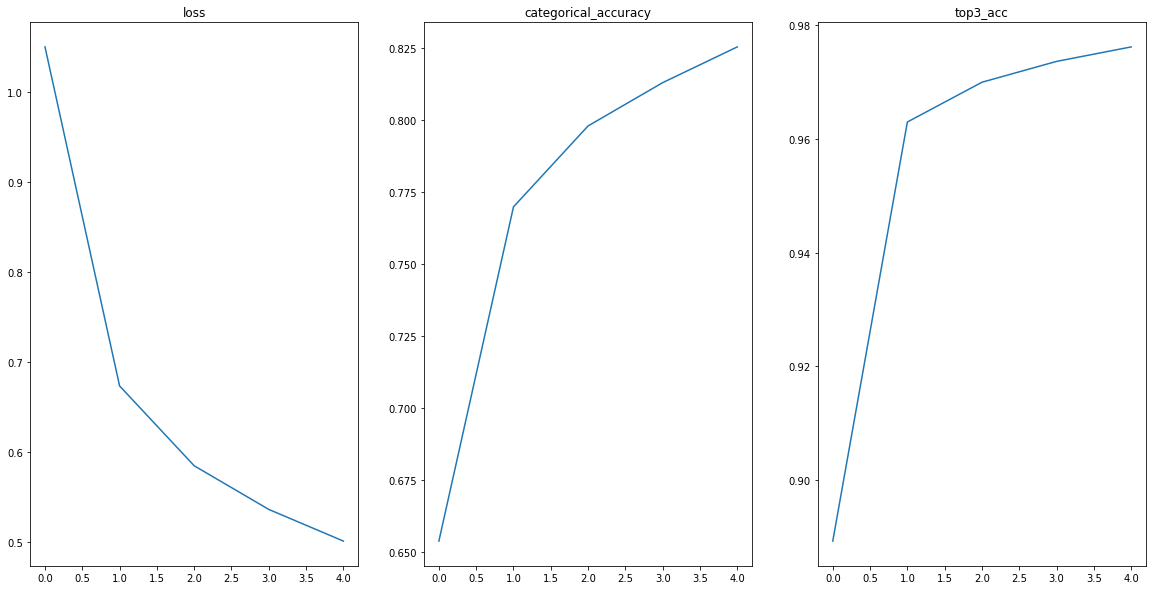

In [4]:
plt.figure(figsize=(20,10))

for i, (name, values) in enumerate(history.history.items()):
    plt.subplot(1, len(history.history.items()), i+1)
    plt.plot(values)
    plt.title(name)

In [5]:
validation_report(test_data=X_test.reshape(-1, 28, 28, 1),
                 test_label=y_test,
                 model=model,
                 names=Labels)

Accuracy: 
0.8345



Confusion matrix: 
[[793   0  11  19   0   0 171   0   0   0]
 [  1 946   2   8   1   0   1   0   2   0]
 [ 32   7 750  12 111   0 131   0   8   0]
 [ 58  27   7 870  48   3  34   0   9   1]
 [  3   9 117  33 719   0 112   0   2   0]
 [  3   1   0   0   1 932   4  26   7   5]
 [ 94   6 100  55 112   0 518   0  18   0]
 [  0   0   1   0   0  42   0 925   5  48]
 [ 16   4  11   3   8   2  29   0 948   2]
 [  0   0   1   0   0  21   0  49   1 944]]



             precision    recall  f1-score   support

T-shirt/top       0.79      0.80      0.80       994
    Trouser       0.95      0.98      0.96       961
   Pullover       0.75      0.71      0.73      1051
      Dress       0.87      0.82      0.85      1057
       Coat       0.72      0.72      0.72       995
     Sandal       0.93      0.95      0.94       979
      Shirt       0.52      0.57      0.54       903
    Sneaker       0.93      0.91      0.92      1021
        Bag       0.95      0.93      0.94      

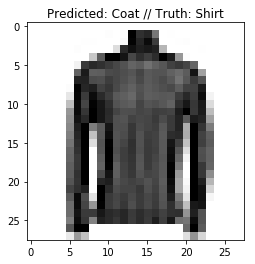

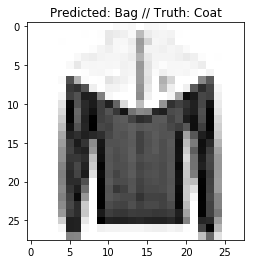

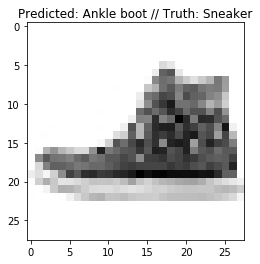

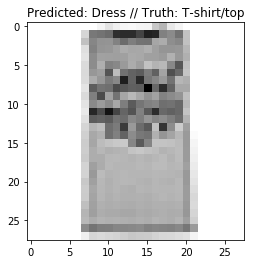

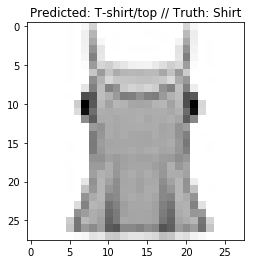

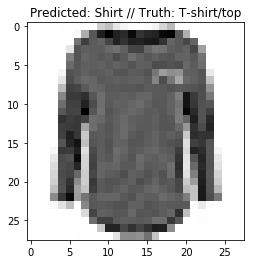

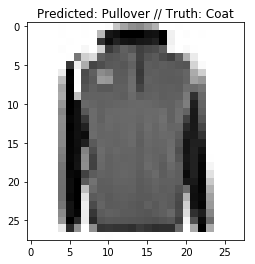

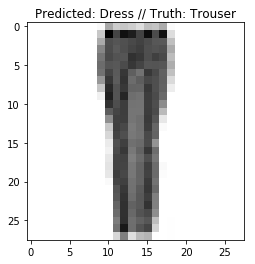

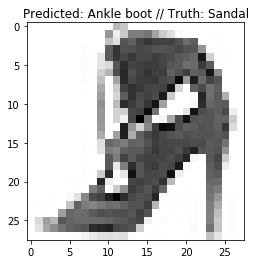

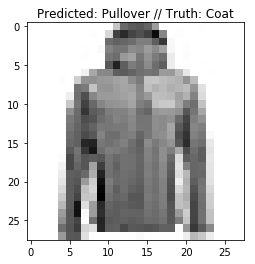

In [6]:
import random


predictions = model.predict(X_test.reshape(-1, 28, 28, 1)).argmax(axis=1)

wrong_predictions = (predictions != y_test)

n_wp = wrong_predictions.sum()

N = 10

for i in range(N):
    
    idx = random.choice(range(n_wp))
    plt.figure()
    plt.imshow(X_test[wrong_predictions,::][idx,::].reshape(28, 28), cmap="Greys")
    
    
    plt.title("Predicted: {0} // Truth: {1}".format(
        Labels[predictions[wrong_predictions][idx]],
        Labels[y_test[wrong_predictions][idx]]
    ))